# Load and Prepare IMDb Dataset
- First, make sure the dataset is properly loaded from the extracted IMDb dataset folder.

In [1]:
import os
import pandas as pd

# Function to load IMDb data from directory
def load_imdb_data(directory):
    reviews = []
    labels = []
    
    # Positive reviews
    pos_dir = os.path.join(directory, 'pos')
    for filename in os.listdir(pos_dir):
        with open(os.path.join(pos_dir, filename), 'r', encoding='utf-8') as file:
            reviews.append(file.read())
            labels.append(1)  # Label as positive
    
    # Negative reviews
    neg_dir = os.path.join(directory, 'neg')
    for filename in os.listdir(neg_dir):
        with open(os.path.join(neg_dir, filename), 'r', encoding='utf-8') as file:
            reviews.append(file.read())
            labels.append(0)  # Label as negative
    
    return pd.DataFrame({'review': reviews, 'sentiment': labels})

# Load the training and test data
train_data = load_imdb_data('aclImdb/train')  # Replace 'path_to' with your directory path
test_data = load_imdb_data('aclImdb/test')

# Display sample data
print(train_data.head())
print(test_data.head())


                                              review  sentiment
0  Bromwell High is a cartoon comedy. It ran at t...          1
1  Homelessness (or Houselessness as George Carli...          1
2  Brilliant over-acting by Lesley Ann Warren. Be...          1
3  This is easily the most underrated film inn th...          1
4  This is not the typical Mel Brooks film. It wa...          1
                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1


# Pre- Processing step

In [2]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Maximum number of words to keep
max_words = 10000  
# Maximum sequence length
max_len = 200      

# Tokenize the reviews
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['review'])

# Convert reviews to sequences
X_train = tokenizer.texts_to_sequences(train_data['review'])
X_test = tokenizer.texts_to_sequences(test_data['review'])

# Pad sequences to ensure uniform input size
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Convert sentiment labels to binary (0 = negative, 1 = positive)
y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values


# Building the LSTM Model

We will now create an LSTM model using Keras. The model will consist of an embedding layer, followed by the LSTM layer, and a dense output layer for binary classification.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))  # Embedding layer
model.add(LSTM(units=128, return_sequences=False))  # LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()


d:\Lab Assignment\Data Science\.venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training the Model

In [4]:
# Train the LSTM model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 124s 308ms/step - accuracy: 0.7019 - loss: 0.5403 - val_accuracy: 0.8423 - val_loss: 0.3749
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 120s 307ms/step - accuracy: 0.8825 - loss: 0.2949 - val_accuracy: 0.8705 - val_loss: 0.3050
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 118s 302ms/step - accuracy: 0.9351 - loss: 0.1860 - val_accuracy: 0.8693 - val_loss: 0.3184
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 118s 302ms/step - accuracy: 0.9455 - loss: 0.1514 - val_accuracy: 0.8620 - val_loss: 0.3709
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 117s 300ms/step - accuracy: 0.9547 - loss: 0.1248 - val_accuracy: 0.8647 - val_loss: 0.4417


# Model Architecture Explained:
- Embedding Layer: Converts words into dense vectors of fixed size.
- LSTM Layer: Captures long-term dependencies in the text data.
- Dropout Layer: Helps prevent overfitting by randomly dropping neurons during training.
- Dense Layer: The final classification layer with softmax activation for binary classification.

# Evaluating the Model

Once the model is trained, evaluate its performance on the test set. You will also visualize key metrics such as accuracy and loss.

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.8752 - loss: 0.3916
Test Accuracy: 0.8647199869155884


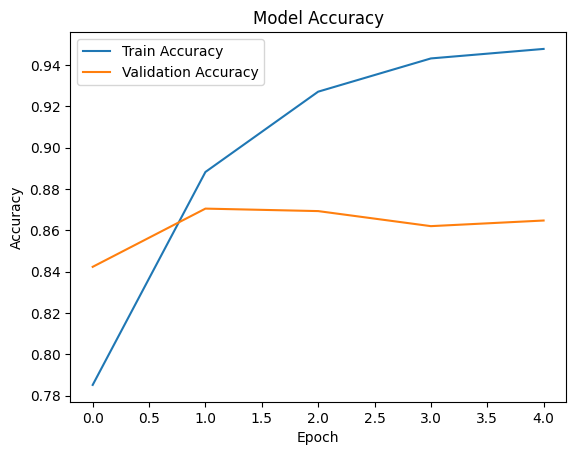

In [5]:
import matplotlib.pyplot as plt

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Confusion Matrix:

782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 59ms/step


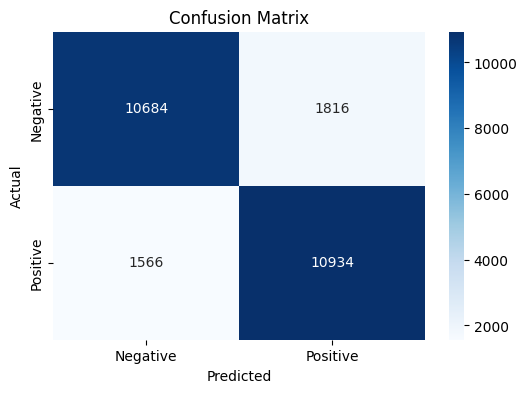

              precision    recall  f1-score   support

    Negative       0.87      0.85      0.86     12500
    Positive       0.86      0.87      0.87     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [7]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict sentiments on test data
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


# Visualizing Model Performance
- We can visualize the accuracy and loss over the training epochs.

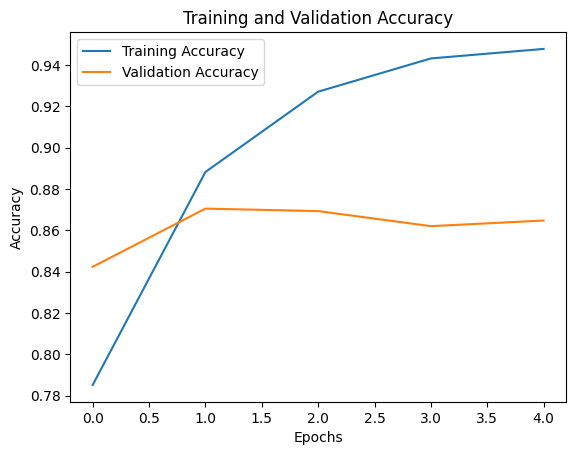

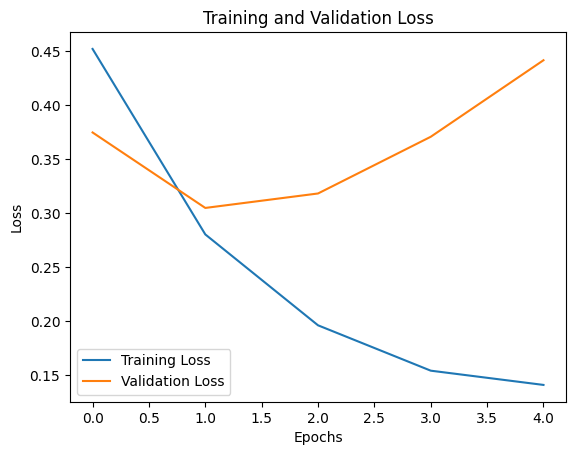

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
